<a href="https://colab.research.google.com/github/Bosy-Ayman/IR/blob/main/IR_Week(7)_Query_Expansion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **The learning outcomes of the this notebook are:**

- Apply query expansion (QE) using the pseudo-relevance feedback (PRF) approach
(with RM3 as the term selection model).
- Evaluate and compare the results of retrieval models with and without QE.
- Study the effect of parameter settings with QE.

In [ ]:
#install the Pyterrier framework
!pip install python-terrier
# install the nltk modules
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.6/107.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.2/335.2 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.9 MB/s eta 0:00:00
  Preparing metadata (setup.

## **The learning outcomes of the this notebook are:**

- Apply query expansion (QE) using the pseudo-relevance feedback (PRF) approach
(with RM3 as the term selection model).


In [ ]:
import pandas as pd
import pyterrier as pt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
import os
pd.set_option('display.max_colwidth', 150)

Since we need to apply QE, we need to install an additional PyTerrier package for pseudo-relevance feedback (**PRF**).

In [ ]:
# Need to install additional terrier package for PRF. It will take around 1 min
!git clone https://github.com/terrierteam/terrier-prf/
!apt-get install maven   #used for Java projects to manage project dependencies and build processes
%cd /content/terrier-prf/
!mvn install
!pwd
%cd ..

fatal: destination path 'terrier-prf' already exists and is not an empty directory.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
maven is already the newest version (3.6.3-5).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/content/terrier-prf
[INFO] Scanning for projects...
[INFO] 
[INFO] ----------------------< org.terrier:terrier-prf >-----------------------
[INFO] Building terrier-prf 0.2-SNAPSHOT
[INFO] --------------------------------[ jar ]---------------------------------
[INFO] 
[INFO] --- maven-resources-plugin:2.6:resources (default-resources) @ terrier-prf ---
[INFO] Using 'UTF-8' encoding to copy filtered resources.
[INFO] skip non existing resourceDirectory /content/terrier-prf/src/main/resources
[INFO] 
[INFO] --- maven-compiler-plugin:3.1:compile (default-compile) @ terrier-prf ---
[INFO] Nothing to compile - all classes are up to date
[INFO] 
[INFO] --- maven-resources-plugin:2.6:testResources (defaul

# **Preprocessing the data set**
Tokenization, Removing stop words and Cleaning

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Initialize Porter stemmer
stemmer = PorterStemmer()

In [ ]:
def Stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    # print (tokens)
    return ' '.join(stemmed_tokens)

def clean(text):
   text = re.sub(r"[\.\,\#_\|\:\?\?\/\=\@]", " ", text) # remove special characters
   text = re.sub(r'\t', ' ', text) # remove tabs
   text = re.sub(r'\n', ' ', text) # remove line jump
   text = re.sub(r"\s+", " ", text) # remove extra white space
   text = text.strip()
   return text

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words] #Lower is used to normalize al the words make them in lower case
    # print('Tokens are:',tokens,'\n')
    return ' '.join(filtered_tokens)

#we need to process the query also as we did for documents
def preprocess(sentence):
  sentence = clean(sentence)
  sentence = remove_stopwords(sentence)
  sentence = Stem_text(sentence)
  return sentence

# Load Data for the Indexer

In [ ]:
import zipfile
zip_file_name = 'cisi.zip'
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('cisi_dataset')
!ls cisi_dataset

CISI.ALL  CISI.QRY  CISI.REL


In [ ]:
def load_cisi_dataset(data_dir):
    documents_path = os.path.join(data_dir, 'CISI.ALL')
    queries_path = os.path.join(data_dir, 'CISI.QRY')
    qrels_path = os.path.join(data_dir, 'CISI.REL')

    documents_df = read_documents(documents_path)
    queries_df = read_queries(queries_path)
    qrels_df = read_qrels(qrels_path)
    return documents_df, queries_df, qrels_df

# Read documents from CISI.ALL file
def read_documents(documents_path):
    with open(documents_path, 'r') as file:
        lines = file.readlines()
    documents = []
    current_document = None
    for line in lines:
        if line.startswith('.I'):
            if current_document is not None:
                current_document['Text'] = current_document['Text'].split('\t')[0].strip()  # Remove anything after the first tab
                documents.append(current_document)
            current_document = {'ID': line.strip().split()[1], 'Text': ''}
        elif line.startswith('.T'):
            continue
        elif line.startswith('.A') or line.startswith('.B') or line.startswith('.W') or line.startswith('.X'):
            continue
        else:
            current_document['Text'] += line.strip() + ' '

    # Append the last document
    if current_document is not None:
        current_document['Text'] = current_document['Text'].split('\t')[0].strip()  # Remove anything after the first tab
        documents.append(current_document)
    documents_df = pd.DataFrame(documents)
    return documents_df

# Read queries from CISI.QRY file
def read_queries(queries_path):
    with open(queries_path, 'r') as file:
        lines = file.readlines()
    query_texts = []
    query_ids = []
    current_query_id = None
    current_query_text = []
    for line in lines:
        if line.startswith('.I'):
            if current_query_id is not None:
                query_texts.append(' '.join(current_query_text))
                current_query_text = []
            current_query_id = line.strip().split()[1]
            query_ids.append(current_query_id)
        elif line.startswith('.W'):
            continue
        elif line.startswith('.X'):
            break
        else:
            current_query_text.append(line.strip())
    # Append the last query
    query_texts.append(' '.join(current_query_text))
    queries_df = pd.DataFrame({
        'qid': query_ids,
        'raw_query': query_texts})
    return queries_df

# Read qrels from CISI.REL file
def read_qrels(qrels_path):
    qrels_df = pd.read_csv(qrels_path, sep='\s+', names=['qid','Q0','docno','label'])
    return qrels_df

In [ ]:
data_dir = '/content/cisi_dataset'
documents_df, queries_df, qrels_df = load_cisi_dataset(data_dir)
documents_df['Text'][0]

"18 Editions of the Dewey Decimal Classifications Comaromi, J.P. The present study is a history of the DEWEY Decimal Classification.  The first edition of the DDC was published in 1876, the eighteenth edition in 1971, and future editions will continue to appear as needed.  In spite of the DDC's long and healthy life, however, its full story has never been told.  There have been biographies of Dewey that briefly describe his system, but this is the first attempt to provide a detailed history of the work that more than any other has spurred the growth of librarianship in this country and abroad. 1"

In [ ]:
documents_df

,ID,Text
0,1,"18 Editions of the Dewey Decimal Classifications Comaromi, J.P. The present study is a history of the DEWEY Decimal Classification. The first edi..."
1,2,"Use Made of Technical Libraries Slater, M. This report is an analysis of 6300 acts of use in 104 technical libraries in the United Kingdom. Librar..."
2,3,"Two Kinds of Power An Essay on Bibliographic Control Wilson, P. The relationships between the organization and control of writings and the organiz..."
3,4,"Systems Analysis of a University Library; final report and research project Buckland, M.K. The establishment of nine new universities in the 1960'..."
4,5,"A Library Management Game: a report on a research project Brophy, P. Although the use of games in professional education has become widespread onl..."
...,...,...
1455,1456,"World Dynamics Forrester, J.W. Over the last several decades interest in economic development, population growth, and the world environment has ex..."
1456,1457,"World Trends in Library Education Bramley, G. One of the most significant aspects of the evolution of librarianship in the twentieth century has b..."
1457,1458,"Legal Restrictions on Exploitation of the Patent Monopoly: An Economic Analysis Baxter, W.A. The patent laws confer on a patentee power to exclude..."
1458,1459,"Language and Thought Poluskin, V.A. This book considers the basic aspects of this complex problem - the historical and social essence of language ..."


In [ ]:
queries_df

,qid,raw_query
0,1,What problems and concerns are there in making up descriptive titles? What difficulties are involved in automatically retrieving articles from app...
1,2,"How can actually pertinent data, as opposed to references or entire articles themselves, be retrieved automatically in response to information req..."
2,3,What is information science? Give definitions where possible.
3,4,Image recognition and any other methods of automatically transforming printed text into computer-ready form.
4,5,What special training will ordinary researchers and businessmen need for proper information management and unobstructed use of information retriev...
...,...,...
107,108,".T A Program for Machine-Mediated Searching .A Toliver, D. A technique of online instruction and assistance to bibliographic data base searchers c..."
108,109,".T Author Cocitation: A Literature Measure of Intellectual Structure .A White, H.D. Griffith, B.C. It is shown that the mapping of a particular a..."
109,110,".T Progress in Documentation. Word Processing: An Introduction and Appraisal .A Whitehead, J. The ""Office of the Future,"" ""Office Technology,"" ""W..."
110,111,".T Document Clustering Using an Inverted File Approach .A Willett, P. An automated document clustering procedure is described which does not requi..."


In [ ]:
qrels_df

,qid,Q0,docno,label
0,1,28,0,0.0
1,1,35,0,0.0
2,1,38,0,0.0
3,1,42,0,0.0
4,1,43,0,0.0
...,...,...,...,...
3109,111,422,0,0.0
3110,111,448,0,0.0
3111,111,485,0,0.0
3112,111,503,0,0.0


In [ ]:
#the docno will be our ID
documents_df["docno"]=documents_df["ID"].astype(str)
documents_df

,ID,Text,docno
0,1,"18 Editions of the Dewey Decimal Classifications Comaromi, J.P. The present study is a history of the DEWEY Decimal Classification. The first edi...",1
1,2,"Use Made of Technical Libraries Slater, M. This report is an analysis of 6300 acts of use in 104 technical libraries in the United Kingdom. Librar...",2
2,3,"Two Kinds of Power An Essay on Bibliographic Control Wilson, P. The relationships between the organization and control of writings and the organiz...",3
3,4,"Systems Analysis of a University Library; final report and research project Buckland, M.K. The establishment of nine new universities in the 1960'...",4
4,5,"A Library Management Game: a report on a research project Brophy, P. Although the use of games in professional education has become widespread onl...",5
...,...,...,...
1455,1456,"World Dynamics Forrester, J.W. Over the last several decades interest in economic development, population growth, and the world environment has ex...",1456
1456,1457,"World Trends in Library Education Bramley, G. One of the most significant aspects of the evolution of librarianship in the twentieth century has b...",1457
1457,1458,"Legal Restrictions on Exploitation of the Patent Monopoly: An Economic Analysis Baxter, W.A. The patent laws confer on a patentee power to exclude...",1458
1458,1459,"Language and Thought Poluskin, V.A. This book considers the basic aspects of this complex problem - the historical and social essence of language ...",1459


In [ ]:
queries_df["qid"]=queries_df["qid"].astype(str)
queries_df

,qid,raw_query
0,1,What problems and concerns are there in making up descriptive titles? What difficulties are involved in automatically retrieving articles from app...
1,2,"How can actually pertinent data, as opposed to references or entire articles themselves, be retrieved automatically in response to information req..."
2,3,What is information science? Give definitions where possible.
3,4,Image recognition and any other methods of automatically transforming printed text into computer-ready form.
4,5,What special training will ordinary researchers and businessmen need for proper information management and unobstructed use of information retriev...
...,...,...
107,108,".T A Program for Machine-Mediated Searching .A Toliver, D. A technique of online instruction and assistance to bibliographic data base searchers c..."
108,109,".T Author Cocitation: A Literature Measure of Intellectual Structure .A White, H.D. Griffith, B.C. It is shown that the mapping of a particular a..."
109,110,".T Progress in Documentation. Word Processing: An Introduction and Appraisal .A Whitehead, J. The ""Office of the Future,"" ""Office Technology,"" ""W..."
110,111,".T Document Clustering Using an Inverted File Approach .A Willett, P. An automated document clustering procedure is described which does not requi..."


In [ ]:
documents_df['processed_text'] = documents_df['Text'].apply(preprocess)
documents_df

,ID,Text,docno,processed_text
0,1,"18 Editions of the Dewey Decimal Classifications Comaromi, J.P. The present study is a history of the DEWEY Decimal Classification. The first edi...",1,18 edit dewey decim classif comaromi j p present studi histori dewey decim classif first edit ddc publish 1876 eighteenth edit 1971 futur edit con...
1,2,"Use Made of Technical Libraries Slater, M. This report is an analysis of 6300 acts of use in 104 technical libraries in the United Kingdom. Librar...",2,use made technic librari slater report analysi 6300 act use 104 technic librari unit kingdom librari use one aspect wider pattern inform use infor...
2,3,"Two Kinds of Power An Essay on Bibliographic Control Wilson, P. The relationships between the organization and control of writings and the organiz...",3,two kind power essay bibliograph control wilson p relationship organ control write organ control knowledg inform inevit enter stori write contain ...
3,4,"Systems Analysis of a University Library; final report and research project Buckland, M.K. The establishment of nine new universities in the 1960'...",4,system analysi univers librari ; final report research project buckland k establish nine new univers 1960 's provok highli stimul re-examin natur ...
4,5,"A Library Management Game: a report on a research project Brophy, P. Although the use of games in professional education has become widespread onl...",5,librari manag game report research project brophi p although use game profession educ becom widespread last decad method use number field mani hun...
...,...,...,...,...
1455,1456,"World Dynamics Forrester, J.W. Over the last several decades interest in economic development, population growth, and the world environment has ex...",1456,world dynam forrest j w last sever decad interest econom develop popul growth world environ expand rapidli world-wid stress increas mani individu ...
1456,1457,"World Trends in Library Education Bramley, G. One of the most significant aspects of the evolution of librarianship in the twentieth century has b...",1457,world trend librari educ bramley g one signific aspect evolut librarianship twentieth centuri emerg librari school potent factor shape new philoso...
1457,1458,"Legal Restrictions on Exploitation of the Patent Monopoly: An Economic Analysis Baxter, W.A. The patent laws confer on a patentee power to exclude...",1458,legal restrict exploit patent monopoli econom analysi baxter w patent law confer patente power exclud other make use sell invent further constitut...
1458,1459,"Language and Thought Poluskin, V.A. This book considers the basic aspects of this complex problem - the historical and social essence of language ...",1459,languag thought poluskin v book consid basic aspect complex problem - histor social essenc languag thought interact histor evolut essenc linguist ...


In [ ]:
queries_df["query"]=queries_df["raw_query"].apply(preprocess)
queries_df

,qid,raw_query,query
0,1,What problems and concerns are there in making up descriptive titles? What difficulties are involved in automatically retrieving articles from app...,problem concern make descript titl difficulti involv automat retriev articl approxim titl usual relev content articl titl
1,2,"How can actually pertinent data, as opposed to references or entire articles themselves, be retrieved automatically in response to information req...",actual pertin data oppos refer entir articl retriev automat respons inform request
2,3,What is information science? Give definitions where possible.,inform scienc give definit possibl
3,4,Image recognition and any other methods of automatically transforming printed text into computer-ready form.,imag recognit method automat transform print text computer-readi form
4,5,What special training will ordinary researchers and businessmen need for proper information management and unobstructed use of information retriev...,special train ordinari research businessmen need proper inform manag unobstruct use inform retriev system problem like encount
...,...,...,...
107,108,".T A Program for Machine-Mediated Searching .A Toliver, D. A technique of online instruction and assistance to bibliographic data base searchers c...",program machine-medi search toliv techniqu onlin instruct assist bibliograph data base searcher call individu instruct data access ( iida ) develo...
108,109,".T Author Cocitation: A Literature Measure of Intellectual Structure .A White, H.D. Griffith, B.C. It is shown that the mapping of a particular a...",author cocit literatur measur intellectu structur white h griffith b c shown map particular area scienc case inform scienc done use author unit an...
109,110,".T Progress in Documentation. Word Processing: An Introduction and Appraisal .A Whitehead, J. The ""Office of the Future,"" ""Office Technology,"" ""W...",progress document word process introduct apprais whitehead j `` offic futur `` `` offic technolog `` `` word process `` `` electron mail `` `` ele...
110,111,".T Document Clustering Using an Inverted File Approach .A Willett, P. An automated document clustering procedure is described which does not requi...",document cluster use invert file approach willett p autom document cluster procedur describ requir use inter-docu similar matrix independ order do...


# Indexing:

In [ ]:
if not pt.started():
  # In this lab, we need to specify that we start PyTerrier with PRF enabled
  pt.init(boot_packages=["com.github.terrierteam:terrier-prf:-SNAPSHOT"])

terrier-assemblies 5.8 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.8 jar not found, downloading to /root/.pyterrier...
Done
terrier-prf -SNAPSHOT jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.10.0 has loaded Terrier 5.8 (built by craigm on 2023-11-01 18:05) and terrier-helper 0.0.8



In [ ]:
indexer = pt.DFIndexer("./DatasetIndex", overwrite=True)
# index the text, record the docnos as metadata
index_ref = indexer.index(documents_df["processed_text"], documents_df["docno"])
print(index_ref.toString())

./DatasetIndex/data.properties


In [ ]:
index = pt.IndexFactory.of(index_ref)

### **Experiments with PRF for QE**

Once we have all our data ready, now we can see how to query expansion using PRF process.

**Experiment 1: query expansion using RM3**

We will use BatchRetrieve PyTerrier class for retrieval using BM25 model. We will then apply query expansion using RM3 model and re-run the retrieval to see the effect of expansion.

**What is RM3?**

A relevance modelling (RM) approach to represent the topic described by the input query. RM3 benifits from a set of documents retrieved in response to that query, to generate a relevance model from which we can compute the probability of observing a term from these documents. Recall that the input query is one way to represent a topic, other representative terms can co-occur with these query terms.
 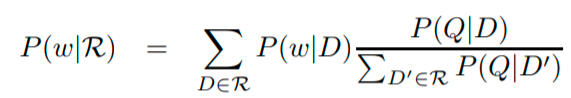
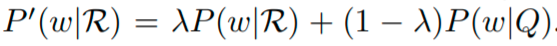

Let's try a single query using BM25 as in earlier labs.

In [ ]:
query="New Supreme Court rules."
query = preprocess(query)

results = bm25.search(query)
results

,qid,docid,docno,rank,score,query
0,1,990,991,0,10.281340,new suprem court rule
1,1,919,920,1,8.730488,new suprem court rule
2,1,837,838,2,8.685511,new suprem court rule
3,1,998,999,3,8.297720,new suprem court rule
4,1,264,265,4,8.119537,new suprem court rule
5,1,245,246,5,8.078718,new suprem court rule
6,1,903,904,6,7.921418,new suprem court rule
7,1,700,701,7,7.838100,new suprem court rule
8,1,713,714,8,7.824322,new suprem court rule
9,1,999,1000,9,7.788328,new suprem court rule


In [ ]:
documents_df[['Text']][documents_df['docno'].isin(results['docno'].loc[0:4].tolist())]

,Text
264,"Code of Cataloging Rules Lubetzky, S. The following rules represent a system designed to produce an instrument essential to the operations and ser..."
837,"Prospects for a New General Classification Austin, Derec In traditional classification schemes, the universe of knowledge is broken down into self..."
919,"Main Entry for Serials Howard, J.H. The nature of serials is such that, in both the ALA Cataloging Rules for Author and Titles Entries and the Ang..."
990,"Filing Arrangement in the Library of Congress Catalogs Rather, John C. New filing rules have been developed for the catalogs of the Library of Con..."
998,"The Impact of International Standardization on the Rules of Entry for Serials Cannan, Judith Proctor The major provisions of the International Ser..."


Let's now see the effect of query expansion on the query above. The process we will perform is as follows:


1. Retrieve an initial set of "psuedo-relevant documents" using a retrieval model (e.g., BM25).
2. Use **RM3** method to score terms in these documents
3. Expand the current query with top terms from Step 2
4. Retrieve the final set of documents with the expanded query.



In [ ]:
# Define our retrieval model
bm25 = pt.BatchRetrieve(index, wmodel="BM25",num_results=10)

results = bm25.search(query)
results

,qid,docid,docno,rank,score,query
0,1,990,991,0,10.281340,new suprem court rule
1,1,919,920,1,8.730488,new suprem court rule
2,1,837,838,2,8.685511,new suprem court rule
3,1,998,999,3,8.297720,new suprem court rule
4,1,264,265,4,8.119537,new suprem court rule
5,1,245,246,5,8.078718,new suprem court rule
6,1,903,904,6,7.921418,new suprem court rule
7,1,700,701,7,7.838100,new suprem court rule
8,1,713,714,8,7.824322,new suprem court rule
9,1,999,1000,9,7.788328,new suprem court rule


In [ ]:
# "rewrite" function from PyTerrier will be used to expand queries specifying RM3 as the model
# fb_docs ==> no. expansion documents
# fb_terms ==> no. expansion terms
rm3_expander = pt.rewrite.RM3(index,fb_terms=10, fb_docs=100)

#output of the BM25 will be fed into the RM3 expander for query expansion.
rm3_qe = bm25 >> rm3_expander
expanded_query = rm3_qe.search(query).iloc[0]["query"]

expanded_query

'applypipeline:off principl^0.025388448 entri^0.043618690 court^0.150000006 catalog^0.066742927 titl^0.015446644 intern^0.030439461 new^0.150000006 rule^0.248586029 name^0.016188180 special^0.017572645 serial^0.067570113 object^0.018446825'

In [ ]:
# Just print the expanded query with term scores
for s in expanded_query.split()[1:]:
  print(s)

print("\n" + query)

principl^0.025388448
entri^0.043618690
court^0.150000006
catalog^0.066742927
titl^0.015446644
intern^0.030439461
new^0.150000006
rule^0.248586029
name^0.016188180
special^0.017572645
serial^0.067570113
object^0.018446825

new suprem court rule


In [ ]:
# After that you can search using the expanded query
expanded_query_formatted = ' '.join(expanded_query.split()[1:])

results_wqe = bm25.search(expanded_query_formatted)

print("   Before Expansion    After Expansion")
print(pd.concat([results[['docid','score']][0:5].add_suffix('_1'),
            results_wqe[['docid','score']][0:5].add_suffix('_2')], axis=1).fillna(''))

#Let's check the tweets text for the top 5 retrieved tweets
documents_df[['Text']][documents_df['docno'].isin(results_wqe['docno'].loc[0:5].tolist())]

   Before Expansion    After Expansion
   docid_1    score_1  docid_2    score_2
0      990  10.281340      919  16.936712
1      919   8.730488      903  15.088821
2      837   8.685511      998  14.825252
3      998   8.297720      999  14.663473
4      264   8.119537     1002  12.508583


,Text
245,"Cataloging Rules ad Principles Lubetzky, S. The present study was undertaken pursuant to an assignment by the Library of Congress. The author was..."
903,"No Special Rules for Entry of Serials Carpenter, Michael One of the objectives of a library catalog is to enable one to determine what books or pu..."
919,"Main Entry for Serials Howard, J.H. The nature of serials is such that, in both the ALA Cataloging Rules for Author and Titles Entries and the Ang..."
998,"The Impact of International Standardization on the Rules of Entry for Serials Cannan, Judith Proctor The major provisions of the International Ser..."
999,"Serial Cataloging Problems: Rules of Entry and Definition of Title Simonton, Wesley Alternatives to the present rule for entry of serials in the A..."
1002,"AACR, ISBD(S) and ISSN: A Comment Fasana, Paul It has been proposed recently that rule 6 of the Anglo-American Cataloging Rules (AACR), relating t..."


In [ ]:
query2="Information Systems."
query2 = preprocess(query2)

results2 = bm25.search(query2)
results2

,qid,docid,docno,rank,score,query
0,1,457,458,0,2.187661,inform system
1,1,537,538,1,2.184549,inform system
2,1,1037,1038,2,2.179465,inform system
3,1,1135,1136,3,2.150536,inform system
4,1,134,135,4,2.119528,inform system
5,1,614,615,5,2.113033,inform system
6,1,629,630,6,2.104819,inform system
7,1,610,611,7,2.095002,inform system
8,1,253,254,8,2.093127,inform system
9,1,1340,1341,9,2.091663,inform system


In [ ]:
documents_df[['Text']][documents_df['docno'].isin(results2['docno'].loc[0:4].tolist())]

,Text
134,"Design of Information Systems and Services Borko, H. This review has selected for emphasis reports on concepts of systems analysis and on the proc..."
457,"Information Retrieval Systems Lancaster, F.W. This book is concerned primarily with those ""intellectual"" factors that significantly affect the per..."
537,"Information Retrieval Systems Lancaster, F.W. 1972 This book is concerned primarily with those ""intellectual"" factors that significantly affect th..."
1037,"Management Misinformation Systems Ackoff, R.L. Five assumptions commonly made by designers of management information systems are identified. It i..."
1135,"Data Retrieval Systems: Specifics and Problems Shtein, V. S. The essential differences between data retrieval system and document retrieval syste..."


In [ ]:
# "rewrite" function from PyTerrier will be used to expand queries specifying RM3 as the model
# fb_docs ==> no. expansion documents
# fb_terms ==> no. expansion terms

rm3_expander2 = pt.rewrite.RM3(index,fb_terms=10, fb_docs=100)

# Now we expand the query and see the resulting query
# For RM3, we need to first retrieve a set of "psuedo-relevant documents" then pass them to the expansion model
rm3_qe = bm25 >> rm3_expander2
expanded_query = rm3_qe.search(query2).iloc[0]["query"] #command will return the expanded query inside a dataframe with one row, access that row (iloc[0])

# Just print the expanded query with term scores
for s in expanded_query.split()[1:]:
  print(s)

# Let's compare to the original query
print("\n" + query2)

system^0.300000012
inform^0.300000012
lin^0.038997713
control^0.040105052
chemic^0.031436931
dissemin^0.025998477
perform^0.066326477
storag^0.045960996
model^0.033966992
primarili^0.030403221
social^0.025998477
manag^0.060805645

inform system


In [ ]:
# After that you can search using the expanded query
expanded_query_formatted = ' '.join(expanded_query.split()[1:])
results_wqe = bm25.search(expanded_query_formatted)

print("   Before Expansion    After Expansion")
print(pd.concat([results2[['docid','score']][0:5].add_suffix('_1'),
            results_wqe[['docid','score']][0:5].add_suffix('_2')], axis=1).fillna(''))
   #print(results_wqe[['docid','score']][0:5])

#Let's check the tweets text for the top 5 retrieved tweets
documents_df[['Text']][documents_df['docno'].isin(results_wqe['docno'].loc[0:5].tolist())]

   Before Expansion    After Expansion
   docid_1   score_1  docid_2   score_2
0      457  2.187661     1037  5.364533
1      537  2.184549      537  4.721913
2     1037  2.179465      458  4.605914
3     1135  2.150536     1061  4.594120
4      134  2.119528      253  4.542392


,Text
253,"Chemical Information Systems Hyde, E. Ash, J.E. The purpose of a chemical information system must not be restricted to the storage and retrieval o..."
457,"Information Retrieval Systems Lancaster, F.W. This book is concerned primarily with those ""intellectual"" factors that significantly affect the per..."
458,"Information Retrieval On-Line Lancaster, F.W. This book deals with on-line systems for bibliographic search and retrieval. The literature on this..."
537,"Information Retrieval Systems Lancaster, F.W. 1972 This book is concerned primarily with those ""intellectual"" factors that significantly affect th..."
1037,"Management Misinformation Systems Ackoff, R.L. Five assumptions commonly made by designers of management information systems are identified. It i..."
1061,"Patterns of Evaluation in Science: Institutionalization, Structure and Functions of the Referee System Zuckerman, H. Merton, R.K. The referee syst..."
